In [ ]:
# This code sets up display options, imports, etc.
!pip install matplotlib_inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib_inline.backend_inline import set_matplotlib_formats

import plotly.express as px
import plotly.io as pio

# set up plotting defaults
%matplotlib inline
set_matplotlib_formats("svg")
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (4, 3)
pio.templates.default = "simple_white"

# display options for numpy and pandas
np.set_printoptions(threshold=20, precision=2, suppress=True)
pd.set_option("display.max_rows", 7)
pd.set_option("display.max_columns", 8)
pd.set_option("precision", 2)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Lab 1: Pandas and Data Cleaning

**Data Science Bootcamp with Python, Pandas, and Plotly**

Feb 21, 2023

## Working with data tables in `pandas`

First, let's go over how to take notes.

What is one plus one?

In [ ]:
1 + 1

2

### Subsetting and Filtering: NBA Salaries

In [ ]:
import pandas as pd
import numpy as np

Let's load in salaries for NBA players in the '21-'22 season.

In [ ]:
def data(csv):
    return f'https://github.com/DS-100/textbook/blob/master/content/datasets/{csv}?raw=true'

data('nba-2022.csv')

'https://github.com/DS-100/textbook/blob/master/content/datasets/nba-2022.csv?raw=true'

In [ ]:
nba = pd.read_csv( data('nba-2022.csv') )
nba = nba.set_index('Player')
nba

,Position,Team,Salary
Player,,,
John Collins,PF,Atlanta Hawks,23000000
Danilo Gallinari,PF,Atlanta Hawks,20475000
Bogdan Bogdanović,SG,Atlanta Hawks,18000000
...,...,...,...
Raul Neto,PG,Washington Wizards,2089448
Daniel Gafford,C,Washington Wizards,1782621
Anthony Gill,PF,Washington Wizards,1517981


### What questions can we answer with this data?

Subsetting and sorting

- What is the average salary of all the players?
- Who are the top 10 highest paid players?
- What was LeBron James's salary?
- What was Stephen Curry's salary?
- Who draws the highest salary?

Filtering

- What team is pay's more for specific position?
- Who are 5 highest paid PFs?

Aggregating

- Which team pays the highest total salary amount?
- What position is the highest paid?
- Which team pays the lowest salary?
- range of salaries by team?

### What is the average salary of all the players?

In [ ]:
nba

,Position,Team,Salary
Player,,,
John Collins,PF,Atlanta Hawks,23000000
Danilo Gallinari,PF,Atlanta Hawks,20475000
Bogdan Bogdanović,SG,Atlanta Hawks,18000000
...,...,...,...
Raul Neto,PG,Washington Wizards,2089448
Daniel Gafford,C,Washington Wizards,1782621
Anthony Gill,PF,Washington Wizards,1517981


In [ ]:
nba['Salary'].mean()

9010810.482939633

### Who are the top 10 highest paid players?

In [ ]:
nba.sort_values('Salary', ascending=False).index[:10]

Index(['Stephen Curry', 'Russell Westbrook', 'James Harden', 'LeBron James',
       'Kevin Durant', 'Giannis Antetokounmpo', 'Paul George',
       'Damian Lillard', 'Jimmy Butler', 'Tobias Harris'],
      dtype='object', name='Player')

### What was LeBron James's salary?

In [ ]:
nba

,Position,Team,Salary
Player,,,
John Collins,PF,Atlanta Hawks,23000000
Danilo Gallinari,PF,Atlanta Hawks,20475000
Bogdan Bogdanović,SG,Atlanta Hawks,18000000
...,...,...,...
Raul Neto,PG,Washington Wizards,2089448
Daniel Gafford,C,Washington Wizards,1782621
Anthony Gill,PF,Washington Wizards,1517981


In [ ]:
nba.loc['Stephen Curry', 'Salary']
#       ~~~~~~~~~~~~~   ~~~~~~~~
#        row label       col label

45780966

In [ ]:
nba.loc[ ['Stephen Curry', 'LeBron James'] , ['Salary', 'Team'] ]

,Salary,Team
Player,,
Stephen Curry,45780966,Golden State Warriors
LeBron James,41180544,Los Angeles Lakers


In [ ]:
nba.loc[ : , ['Salary', 'Team'] ]

,Salary,Team
Player,,
John Collins,23000000,Atlanta Hawks
Danilo Gallinari,20475000,Atlanta Hawks
Bogdan Bogdanović,18000000,Atlanta Hawks
...,...,...
Raul Neto,2089448,Washington Wizards
Daniel Gafford,1782621,Washington Wizards
Anthony Gill,1517981,Washington Wizards


In [ ]:
# these two lines give the same output
nba['Salary']
nba.loc[:, 'Salary']

Player
John Collins         23000000
Danilo Gallinari     20475000
Bogdan Bogdanović    18000000
                       ...   
Raul Neto             2089448
Daniel Gafford        1782621
Anthony Gill          1517981
Name: Salary, Length: 381, dtype: int64

### Who draws the fifth highest salary?

In [ ]:
nba

,Position,Team,Salary
Player,,,
John Collins,PF,Atlanta Hawks,23000000
Danilo Gallinari,PF,Atlanta Hawks,20475000
Bogdan Bogdanović,SG,Atlanta Hawks,18000000
...,...,...,...
Raul Neto,PG,Washington Wizards,2089448
Daniel Gafford,C,Washington Wizards,1782621
Anthony Gill,PF,Washington Wizards,1517981


In [ ]:
nba.loc['Stephen Curry', 'Salary']

45780966

In [ ]:
nba.iloc[0:5, 0:2]

,Position,Team
Player,,
John Collins,PF,Atlanta Hawks
Danilo Gallinari,PF,Atlanta Hawks
Bogdan Bogdanović,SG,Atlanta Hawks
Clint Capela,C,Atlanta Hawks
Delon Wright,SG,Atlanta Hawks


In [ ]:
# These two lines of code have the same output
nba.sort_values('Salary', ascending=False).iloc[0:5, :]
nba.sort_values('Salary', ascending=False)[0:5]

,Position,Team,Salary
Player,,,
Stephen Curry,PG,Golden State Warriors,45780966
Russell Westbrook,PG,Los Angeles Lakers,44211146
James Harden,PG,Brooklyn Nets,43848000
LeBron James,SF,Los Angeles Lakers,41180544
Kevin Durant,PF,Brooklyn Nets,40918900


## Filtering

- What team is pay's more for specific position?
- Who are 5 highest paid PFs?

In [ ]:
nba

,Position,Team,Salary
Player,,,
John Collins,PF,Atlanta Hawks,23000000
Danilo Gallinari,PF,Atlanta Hawks,20475000
Bogdan Bogdanović,SG,Atlanta Hawks,18000000
...,...,...,...
Raul Neto,PG,Washington Wizards,2089448
Daniel Gafford,C,Washington Wizards,1782621
Anthony Gill,PF,Washington Wizards,1517981


In [ ]:
(nba.loc[nba['Position'] == 'PF', :]
 .sort_values('Salary', ascending=False)
 .iloc[0:5, :])

,Position,Team,Salary
Player,,,
Kevin Durant,PF,Brooklyn Nets,40918900
Giannis Antetokounmpo,PF,Milwaukee Bucks,39344970
Tobias Harris,PF,Philadelphia 76ers,36000000
Blake Griffin,PF,Detroit Pistons,32405817
Kristaps Porziņģis,PF,Dallas Mavericks,31650600


In [ ]:
# This cell is the same output as the one above
nba[nba['Position'] == 'PF'].sort_values('Salary', ascending=False)[0:5]

### Aggregating

- Which team pays the highest total salary amount?
- What position is the highest paid?
- Which team pays the lowest salary?
- range of salaries by team?

### Aggregating: Dog Breed Data

Filtering:

- How many large dogs have a lifetime_cost over $20,000?

Aggregating:

- What is mean lifetime cost per kind of dog?
- Which size dogs tend to live the longest?
- average lifetime cost of working dogs?

Other:

- What are the distinct kinds of dogs?
- What is the optimal dog? i.e. longest life with the smallest costs

What data table would you need to answer this question?

- How many Pit Bulls are owned by NBA players?

In [ ]:
dogs = pd.read_csv(data('dogs43.csv'))
dogs

,breed,kind,lifetime_cost,longevity,size,weight,height
0,Brittany,sporting,22589.0,12.92,medium,35.0,19.0
1,Cairn Terrier,terrier,21992.0,13.84,small,14.0,10.0
2,English Cocker Spaniel,sporting,18993.0,11.66,medium,30.0,16.0
...,...,...,...,...,...,...,...
40,Bullmastiff,working,13936.0,7.57,large,115.0,25.5
41,Mastiff,working,13581.0,6.50,large,175.0,30.0
42,Saint Bernard,working,20022.0,7.78,large,155.0,26.5


### What is mean lifetime cost per kind of dog?

In [ ]:
dogs.groupby('kind')['lifetime_cost'].mean()

kind
herding         22492.00
hound           18540.60
non-sporting    22638.67
sporting        21300.00
terrier         20365.62
toy             20195.50
working         19658.71
Name: lifetime_cost, dtype: float64

In [ ]:
dogs.groupby('kind').mean()

,lifetime_cost,longevity,weight,height
kind,,,,
herding,22492.00,12.39,24.00,12.75
hound,18540.60,10.09,64.60,24.20
non-sporting,22638.67,13.55,17.00,12.00
sporting,21300.00,11.65,54.12,21.44
terrier,20365.62,11.66,26.25,13.31
toy,20195.50,12.39,10.92,10.38
working,19658.71,9.20,110.71,25.75


### Which size dogs tend to live the longest?

In [ ]:
dogs.groupby('size')['longevity'].mean()

size
large      9.65
medium    11.67
small     12.68
Name: longevity, dtype: float64

In [ ]:
dogs.groupby(['size', 'kind']).mean()

lifetime_cost  longevity  weight  height
size  kind                                              
large hound          17651.75       9.21   75.00   26.12
      sporting       21382.40      11.22   63.40   24.80
      working        19260.33       8.64  121.25   26.42
...                       ...        ...     ...     ...
small sporting       24330.00      12.50   25.00   14.50
      terrier        21109.00      12.32   16.50   10.30
      toy            20529.20      12.67    9.90    9.25

[13 rows x 4 columns]

### Putting it all Together: Baby Names

#### Lilith, Lilibet … Lucifer? How Baby Names Went to ‘L’

https://archive.is/NpORG

### What are the claims made in the article?

- "Luna has gone from almost nonexistent 20 years ago to number 14 on the Social Security Administration list of popular names."
- "Then there were the “K” names, which the Kardashians helped popularize in the 2000s. The sound of the letter is what becomes fashionable."
- "there were more than 50 boys in the United States named Lucifer last year."

Joining

- Categories of names: e.g. "Nature names is one of those categories that just keeps growing."

In [ ]:
baby = pd.read_csv(data('babynames.csv'))
baby

,Name,Sex,Count,Year
0,Liam,M,19659,2020
1,Noah,M,18252,2020
2,Oliver,M,14147,2020
...,...,...,...,...
2020719,Verona,F,5,1880
2020720,Vertie,F,5,1880
2020721,Wilma,F,5,1880


In [ ]:
nyt = pd.read_csv(data('nyt_names.csv'))
nyt

,nyt_name,category
0,Lucifer,forbidden
1,Lilith,forbidden
2,Danger,forbidden
...,...,...
20,Venus,celestial
21,Celestia,celestial
22,Skye,celestial


In [ ]:
baby_catgs = baby.merge(nyt, left_on='Name', right_on='nyt_name')
baby_catgs

,Name,Sex,Count,Year,nyt_name,category
0,Julius,M,960,2020,Julius,mythology
1,Julius,M,944,2019,Julius,mythology
2,Julius,M,979,2018,Julius,mythology
...,...,...,...,...,...,...
2290,Debbie,F,10,1886,Debbie,boomer
2291,Debbie,F,9,1884,Debbie,boomer
2292,Debbie,F,6,1880,Debbie,boomer


In [ ]:
baby_catgs.groupby('category').sum()

,Count,Year
category,,
boomer,2626336,1578118
celestial,34015,750067
evangelical,13016,733959
forbidden,7820,161285
mineral,6676,231918
mythology,101811,1057711


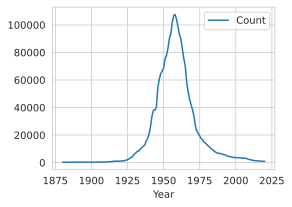

In [ ]:
(baby_catgs.loc[baby_catgs['category'] == 'boomer', :]
 .groupby('Year')
 .sum()
 .plot()
 )

### "Luna has gone from almost nonexistent 20 years ago to number 14 on the Social Security Administration list of popular names."

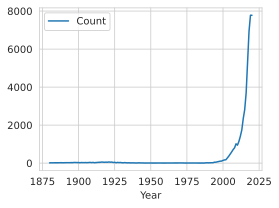

In [ ]:
(baby[baby['Name'] == 'Luna']
 .groupby('Year')
 .sum()
 .plot()
)

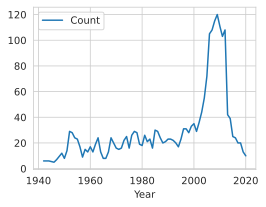

In [ ]:
(baby[baby['Name'] == 'Siri']
 .groupby('Year')
 .sum()
 .plot()
)

### Recap: Data table manipulation

- Subsetting: taking rows and columns out of a dataframe
  - E.g. "How much did LeBron get paid in 2022?"
  - `.loc` to subset by labels
  - `.iloc` to subset by positions
  - `[]` as a shorthand
  - `.sort_values()` to sort
  - `.index` to grab the index of a dataframe
  - Arithmetic on series: `series / 10`
- Filtering: taking rows based on a criteria
  - E.g. How much were the top 5 power forwards paid?
  - Boolean series
  - E.g. `nba.loc[nba['position'] == 'PF', :]`
- Aggregating: grouping rows together based on categories
  - E.g. do small dogs live longer than medium and large dogs?
  - `.groupby()` with an aggregation method like `.mean()`.
  - `.median()`, `.std()`, `.min()`, `.max()`.
- Joining: merging two dataframes together
  - `.merge()`, specify labels to merge on
  - `.join()`, recommend using `.merge()` instead
- Plotting (just a bit)
  - `.plot()` to make a line plot


## Data Cleaning

### CO2 Measurements on Mauna Loa

www.esrl.noaa.gov/gmd/ccgg/trends/

In [ ]:
!wget --output-document "co2_mm_mlo.txt" "https://github.com/DS-100/textbook/blob/master/content/datasets/co2_mm_mlo.txt?raw=true" 2> /dev/null

In [ ]:
!head co2_mm_mlo.txt

# --------------------------------------------------------------------
# USE OF NOAA ESRL DATA
# 
# These data are made freely available to the public and the
# scientific community in the belief that their wide dissemination
# will lead to greater understanding and new scientific insights.
# The availability of these data does not constitute publication
# of the data.  NOAA relies on the ethics and integrity of the user to
# ensure that ESRL receives fair credit for their work.  If the data 
# are obtained for potential use in a publication or presentation, 


In [ ]:
from pathlib import Path

lines = Path('co2_mm_mlo.txt').read_text().split('\n')
len(lines)

811

In [ ]:
lines[:6]

['# --------------------------------------------------------------------',
 '# USE OF NOAA ESRL DATA',
 '# ',
 '# These data are made freely available to the public and the',
 '# scientific community in the belief that their wide dissemination',
 '# will lead to greater understanding and new scientific insights.']

In [ ]:
lines[69:79]

['#',
 '#            decimal     average   interpolated    trend    #days',
 '#             date                             (season corr)',
 '1958   3    1958.208      315.71      315.71      314.62     -1',
 '1958   4    1958.292      317.45      317.45      315.29     -1',
 '1958   5    1958.375      317.50      317.50      314.71     -1',
 '1958   6    1958.458      -99.99      317.10      314.85     -1',
 '1958   7    1958.542      315.86      315.86      314.98     -1',
 '1958   8    1958.625      314.93      314.93      315.94     -1',
 '1958   9    1958.708      313.20      313.20      315.91     -1']

In [ ]:
co2 = pd.read_csv('co2_mm_mlo.txt', skiprows=72, header=None, sep='\s+',
            names=['Yr', 'Mo', 'DecDate', 'Avg', 'Int', 'Trend', 'days'])
co2

,Yr,Mo,DecDate,Avg,Int,Trend,days
0,1958,3,1958.21,315.71,315.71,314.62,-1
1,1958,4,1958.29,317.45,317.45,315.29,-1
2,1958,5,1958.38,317.50,317.50,314.71,-1
...,...,...,...,...,...,...,...
735,2019,6,2019.46,413.92,413.92,411.58,27
736,2019,7,2019.54,411.77,411.77,411.43,23
737,2019,8,2019.62,409.95,409.95,411.84,29


### Missing Data

In [ ]:
px.line(co2, x='DecDate', y='Avg')

In [ ]:
px.histogram(co2, x='Avg')

### You Try:

Get all the recordings with missing CO2 data (where the Avg column is less than 0)

In [ ]:
co2[co2['Avg'] < 0]

,Yr,Mo,DecDate,Avg,Int,Trend,days
3,1958,6,1958.46,-99.99,317.10,314.85,-1
7,1958,10,1958.79,-99.99,312.66,315.61,-1
71,1964,2,1964.12,-99.99,320.07,319.61,-1
72,1964,3,1964.21,-99.99,320.73,319.55,-1
73,1964,4,1964.29,-99.99,321.77,319.48,-1
213,1975,12,1975.96,-99.99,330.59,331.60,0
313,1984,4,1984.29,-99.99,346.84,344.27,2


In [ ]:
# Don't worry about understanding this code for now, just look at the plots
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=1, cols=3,
    subplot_titles=("Missing Dropped", 
                    "Missing Set to NaN", "Missing Interpolated"))

co2_small = (co2[co2['Avg'] > 0])[:8] 

fig.add_trace(
    go.Scatter(x=co2_small['Mo'], y=co2_small['Avg'], 
               mode='lines+markers'),
    row=1, col=1)

co2_na = (co2.replace(-99.99, np.NaN))[:10]

fig.add_trace(
    go.Scatter(x=co2_na['Mo'], y=co2_na['Avg'], mode='lines+markers'),
    row=1, col=2)

fig.add_trace(
    go.Scatter(x=co2_na['Mo'], y=co2_na['Int'], mode='lines+markers'),
    row=1, col=3)

fig.update_xaxes(tickvals = np.arange(3, 13, 1), row=1, col=1)
fig.update_xaxes(tickvals = np.arange(3, 13, 1), row=1, col=2)
fig.update_xaxes(tickvals = np.arange(3, 13, 1), row=1, col=3)

fig.update_layout(height=350, margin=dict(t=30, b=0), showlegend=False)

fig.show()

In [ ]:
co2

,Yr,Mo,DecDate,Avg,Int,Trend,days
0,1958,3,1958.21,315.71,315.71,314.62,-1
1,1958,4,1958.29,317.45,317.45,315.29,-1
2,1958,5,1958.38,317.50,317.50,314.71,-1
...,...,...,...,...,...,...,...
735,2019,6,2019.46,413.92,413.92,411.58,27
736,2019,7,2019.54,411.77,411.77,411.43,23
737,2019,8,2019.62,409.95,409.95,411.84,29


### Granularity

In [ ]:
co2

,Yr,Mo,DecDate,Avg,Int,Trend,days
0,1958,3,1958.21,315.71,315.71,314.62,-1
1,1958,4,1958.29,317.45,317.45,315.29,-1
2,1958,5,1958.38,317.50,317.50,314.71,-1
...,...,...,...,...,...,...,...
735,2019,6,2019.46,413.92,413.92,411.58,27
736,2019,7,2019.54,411.77,411.77,411.43,23
737,2019,8,2019.62,409.95,409.95,411.84,29


In [ ]:
co2_by_year = co2.groupby('Yr')['Int'].mean()
px.line(co2_by_year)

#### You Try:

Find the average CO2 for each year, then plot the CO2 vs. year

In [ ]:
...

In [ ]:
fig = ...
fig.update_layout(showlegend=False)
fig

### Data Cleaning Principles

- Check data quality
  - Scope: do our data match our understanding of the population?
  - Measurements and values: are the values reasonable?
  - Relationships: Are related features in agreement?
  - Analysis: Which features might be useful in a future analysis?
- Look for missing values
  - Missing at random vs. nonrandom
  - Imputing
    - Deductive, mean, hot-deck
- Transform data
  - Type
  - Math (e.g. grams to kg)
  - Extraction
  - Timestamp
- Modify structure
  - Simplify (dropping columns)
  - Granularity (aggregating)
  - Reshaping (wide to long, or tidy)

## Case Study: Restaurant Safety Violations

https://data.sfgov.org/Health-and-Social-Services/Restaurant-Scores-LIVES-Standard/pyih-qa8i

In [ ]:
# businesses
bus = pd.read_csv(data('SF_Restaurant_Inspections/businesses.csv'), encoding='ISO-8859-1')

# inspections
insp = pd.read_csv(data('SF_Restaurant_Inspections/inspections.csv'))

# violations
viol = pd.read_csv(data('SF_Restaurant_Inspections/violations.csv'))

In [ ]:
viol

,business_id,date,description
0,19,20171211,Inadequate food safety knowledge or lack of ce...
1,19,20171211,Unapproved or unmaintained equipment or utensils
2,19,20160513,Unapproved or unmaintained equipment or utensi...
...,...,...,...
39039,94231,20171214,High risk vermin infestation [ date violation...
39040,94231,20171214,Moderate risk food holding temperature [ dat...
39041,94231,20171214,Wiping cloths not clean or properly stored or ...


### Check Data Quality

#### You Try:

Write Python code to explore the `'postal_code'` column in `bus`. Find at least two issues.

In [ ]:
bus['postal_code'].value_counts()

94110    596
94103    552
94102    462
        ... 
94545      1
941        1
94544      1
Name: postal_code, Length: 48, dtype: int64

In [ ]:
bus[bus['postal_code'] == 'Ca']

,business_id,name,address,city,...,postal_code,latitude,longitude,phone_number
5480,88139,TACOLICIOUS,2250 CHESTNUT ST,San Francisco,...,Ca,NaN,NaN,+14156496077


In [ ]:
px.histogram(insp['score'])

In [ ]:
viol.loc[39039, 'description']

'High risk vermin infestation  [ date violation corrected: 12/15/2017 ]'

### Look for Missing Data

#### You Try:

How many rows in `bus` have missing values for `'postal_code'`?

In [ ]:
bus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6406 entries, 0 to 6405
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   business_id   6406 non-null   int64  
 1   name          6406 non-null   object 
 2   address       6406 non-null   object 
 3   city          6406 non-null   object 
 4   state         6406 non-null   object 
 5   postal_code   6166 non-null   object 
 6   latitude      3270 non-null   float64
 7   longitude     3270 non-null   float64
 8   phone_number  5766 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 450.5+ KB


### Transform Data

In [ ]:
insp['date']

0        20160513
1        20171211
2        20171101
           ...   
14219    20171220
14220    20171130
14221    20171214
Name: date, Length: 14222, dtype: int64

https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes

In [ ]:
dates = pd.to_datetime(insp['date'], format='%Y%m%d')
dates

0       2016-05-13
1       2017-12-11
2       2017-11-01
           ...    
14219   2017-12-20
14220   2017-11-30
14221   2017-12-14
Name: date, Length: 14222, dtype: datetime64[ns]

In [ ]:
dates.dt.year

0        2016
1        2017
2        2017
         ... 
14219    2017
14220    2017
14221    2017
Name: date, Length: 14222, dtype: int64

In [ ]:
ins2016 = insp.assign(timestamp=dates, year=dates.dt.year)
ins2016 = ins2016[ins2016['year'] == 2016]
ins2016

,business_id,score,date,type,timestamp,year
0,19,94,20160513,routine,2016-05-13,2016
3,24,98,20161005,routine,2016-10-05,2016
4,24,96,20160311,routine,2016-03-11,2016
...,...,...,...,...,...,...
13820,90096,91,20161229,routine,2016-12-29,2016
13850,90268,100,20161229,routine,2016-12-29,2016
13852,90269,100,20161229,routine,2016-12-29,2016


In [ ]:
viol

,business_id,date,description
0,19,20171211,Inadequate food safety knowledge or lack of ce...
1,19,20171211,Unapproved or unmaintained equipment or utensils
2,19,20160513,Unapproved or unmaintained equipment or utensi...
...,...,...,...
39039,94231,20171214,High risk vermin infestation [ date violation...
39040,94231,20171214,Moderate risk food holding temperature [ dat...
39041,94231,20171214,Wiping cloths not clean or properly stored or ...


# Ended here on Feb 21, see the solutions notebook for the completed code!

#### You Try:

Use `vio2016` to create a dataframe called `num_vios` that has one row per inspection. It should have three columns:

- `business_id`: The business ID.
- `timestamp`: The date of the inspection.
- `num_vio`: The total number of violations the inspection recorded on that date.

The resulting dataframe should have 4806 rows.

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

### Do certain kinds of violations impact safety score more than others?

#### You Try:

Display the top 15 most common violations.

In [ ]:
...

In [ ]:
from IPython.display import display
with pd.option_context("display.max_rows", 15):
    display(vio2016['description'].value_counts().head(15).to_frame())

In [ ]:
def make_vio_categories(vio):
    def has(term):
        return vio['description'].str.contains(term)

    return vio[['business_id', 'timestamp']].assign(
        high_risk        = has(r"high risk"),
        clean            = has(r"clean|sanit"),
        food_surface     = (has(r"surface") & has(r"\Wfood")),
        vermin           = has(r"vermin"),
        storage          = has(r"thaw|cool|therm|storage"),
        permit           = has(r"certif|permit"),
        non_food_surface = has(r"wall|ceiling|floor|surface"),
        human            = has(r"hand|glove|hair|nail"),
    )

In [ ]:
# The violations with the new categories.
# `vio_ctg` is short for `violation categories`.
vio_ctg = ...
vio_ctg

In [ ]:
# Need to change granularity
vio_counts = ...
vio_counts

In [ ]:
feature_names = ['high_risk', 'clean', 'food_surface', 'vermin',
                 'storage', 'permit', 'non_food_surface', 'human']

def left_join_features(ins):
    return (ins[['business_id', 'timestamp', 'score']]
            .merge(vio_counts, on=['business_id', 'timestamp'], how='left'))

def zero_features_for_perfect_scores(ins):
    ins = ins.copy()
    ins.loc[ins['score'] == 100, feature_names] = 0
    return ins

In [ ]:
ins_and_vios = (ins2016.pipe(left_join_features)
                .pipe(zero_features_for_perfect_scores))
ins_and_vios.head(3)

In [ ]:
...

In [ ]:
...